# Health Insurance Cost Prediction

## Data Preprocessing

### Import The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing The Dataset

In [2]:
ins = pd.read_csv('insurance.csv')
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Visualization

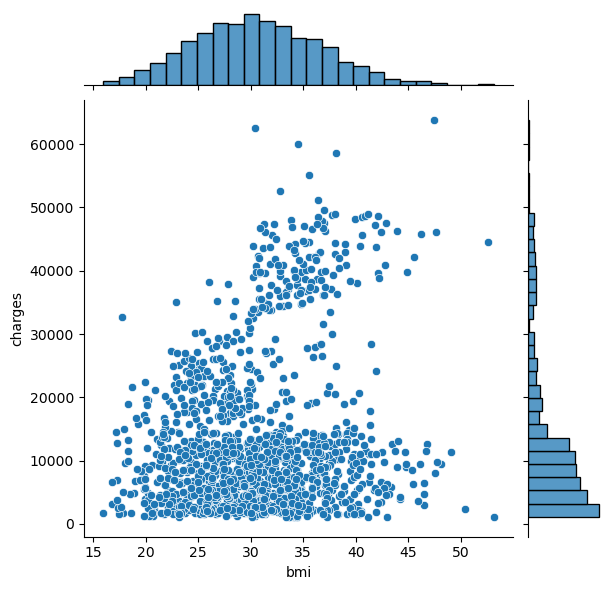

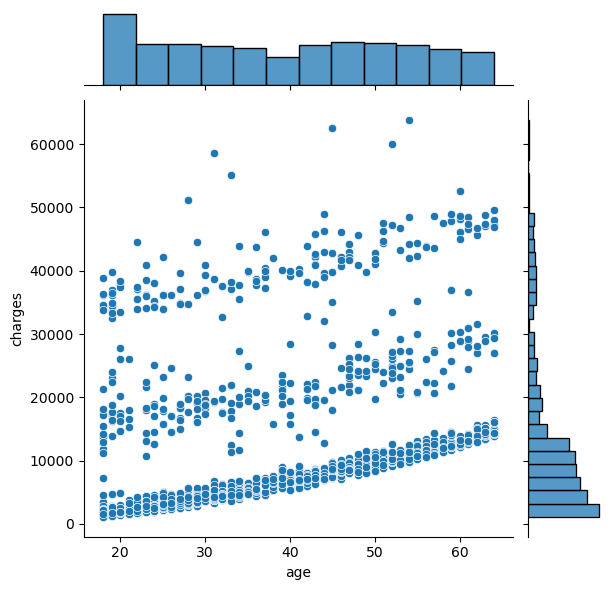

In [3]:
sns.jointplot(x=ins['bmi'], y=ins['charges'])
sns.jointplot(x=ins['age'], y=ins['charges'])

<AxesSubplot:xlabel='age', ylabel='charges'>

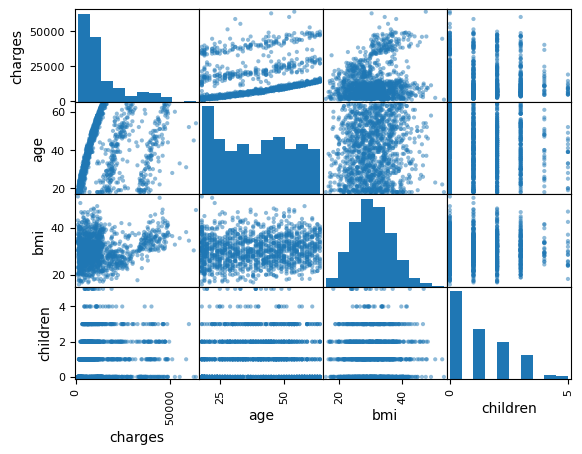

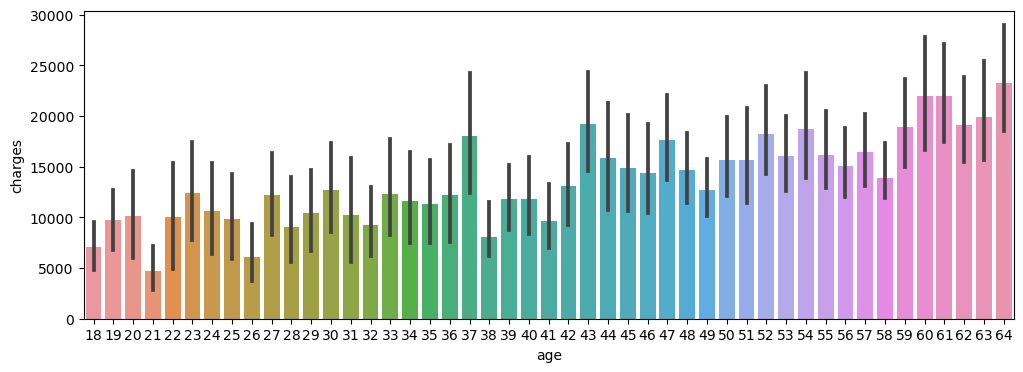

In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(ins[['charges','age','bmi','children']])
plt.figure(figsize = (12, 4))
sns.barplot(x='age', y='charges', data=ins)

### Taking Care Of Missing Data

In [5]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
ins['sex'] = enc.fit_transform(ins.sex)
ins['smoker'] = enc.fit_transform(ins.smoker)
ins['region'] = enc.fit_transform(ins.region)
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<AxesSubplot:xlabel='smoker', ylabel='charges'>

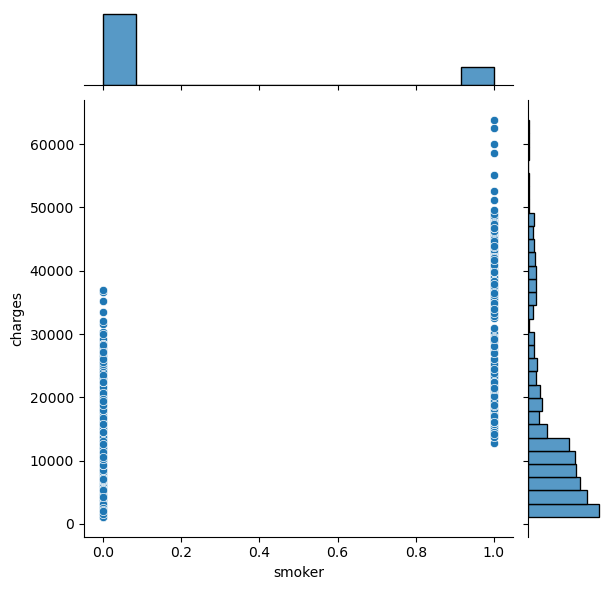

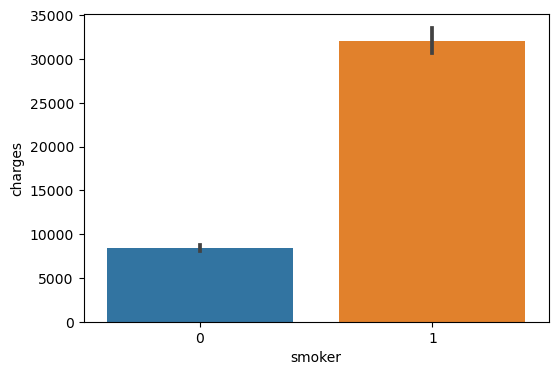

In [7]:
sns.jointplot(x=ins['smoker'], y=ins['charges'])
plt.figure(figsize = (6,4))
sns.barplot(x=ins['smoker'], y=ins['charges'])

### One Hot Encoding

In [8]:
x = ins.iloc[:,:6]
y = ins.iloc[:,6]

In [9]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
df_dum = pd.get_dummies(ins['region'], prefix = 'region')
x = pd.concat([x, df_dum], axis=1)
x = x.drop('region', axis=1)

In [10]:
x = x.drop('region_0', axis=1)
x.head()

,age,sex,bmi,children,smoker,region_1,region_2,region_3
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0


In [11]:
x = ins.iloc[:,:6]
y = ins.iloc[:,6]

### Splitting Data Into Train and Test

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Model Building

### Training And Testing The Model

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

### Evaluation 

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7995699022315393

In [16]:
import pickle
pickle.dump(lr,open('test.pkl','wb'))
model=pickle.load(open('test.pkl','rb'))

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\vinay\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
